## Business Analytics project

<strong>Goal</strong>: to help optimize marketing expenses at Yandex.Afisha
<p><strong>Steps</strong>: the three sources of data were analysed: Server logs with data on Yandex.Afisha visits from June 2017 through May 2018, Dump file with all orders for the period, Marketing expenses statistics. The major business metrics were calculated: retention, conversion rates; LTV/CAC/ROMI, average and total numbers of visitors/orders/costs for specific periods, cohorts, sources.</p>


* [I. Data preparation](#chapter1)
* [II DATA ANALYSIS](#chapter2)
    * [Product](#section_2_1)
        * [Visitors per day, week, and month](#section_2_1_1)
        * [Sessions per day](#section_2_1_2)
        * [The length of sessions](#section_2_1_3)
        * [User retention](#section_2_1_4)
    * [Sales](#section_2_2)
        * [Conversion rate](#section_2_2_1)
        * [Number of orders](#section_2_2_2)
        * [Average purchase size](#section_2_2_3)
        * [LTV](#section_2_2_4)
    * [Marketing](#section_2_3)
        * [Costs Overall/per source/over time](#section_2_3_1)
        * [CAC](#section_2_3_2)
        * [ROI](#section_2_3_3)
* [CONCLUSION](#chapter3)


### I. Data preparation <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

display(visits.head())
display(orders.head())
display(costs.head())

visits.info(memory_usage='deep')
orders.info(memory_usage='deep')
costs.info(memory_usage='deep')

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">According to the analysis of general information of the three tables (visits, orders, costs) I found out that:
1. there is no NaN values in the tables,
2. the data can be optimized (be converting the data types)
    </div>

In [2]:
print(visits['Device'].value_counts())
visits['Device'] = visits['Device'].astype('category') 
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M") 
display(visits.info(memory_usage='deep'))



desktop    262567
touch       96833
Name: Device, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


None

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    To start with <strong>visits</strong> table:
    <ol>
   <li> 1. the device column has only two values. That is why the data type can be converted to "category".</li>
        <li>2. The date columns (start ts, end ts) were converted to the datetime64 type.</li>
    </ol>
As a result, the file size was changed: from 79.3 MB to 11.3 MB (the 7th of the initial size).
</div>

In [3]:
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M")
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d") 
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['order_ts', 'revenue', 'uid']

orders.info(memory_usage='deep')
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
order_ts    50415 non-null datetime64[ns]
revenue     50415 non-null float64
uid         50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    In <strong>orders</strong> and <strong>costs</strong> tables the date columns were also converted to datetime64 format. As a result, the file size of both tables was reduced. Additionally, the column names <strong>visits</strong> and <strong>orders</strong> tables were converted to the conventional format (lowercased, without spaces). 
</div>

In [4]:
print('Number of duplicates(visits): ', visits.duplicated().sum())
print('Number of duplicates (orders): ', orders.duplicated().sum())
print('Number of duplicates (costs): ', costs.duplicated().sum())

Number of duplicates(visits):  0
Number of duplicates (orders):  0
Number of duplicates (costs):  0


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
Finally, all the tables were checked for explicit duplicates. 
</div>

### II DATA ANALYSIS <a class="anchor" id="chapter2"></a>

## Product  <a class="anchor" id="section_2_1"></a>

### How many people use it every day, week, and month? <a class="anchor" id="section_2_1_1"></a>

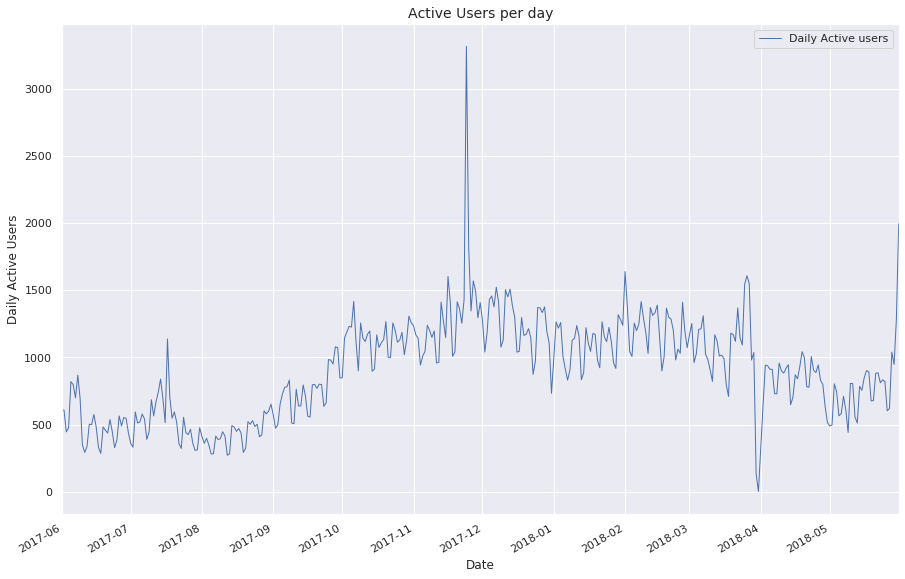

In [5]:
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['week']  = visits['start_ts'].astype('datetime64[W]')
visits['day'] = visits['start_ts'].astype('datetime64[D]')
daily_active_users = visits.groupby('day')['uid'].nunique()

sns.set(font_scale=1,rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
daily_active_users.plot(ax=ax, linewidth=1, label='Daily Active users')
plt.xlabel("Date")
plt.ylabel("Daily Active Users")
plt.title("Active Users per day", size=14)
plt.legend()
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
First of all, the <strong>user activity</strong> was assessed (per day/ per week/ per month).
To start with the number of daily active (unique) users (DAU), one may mention (according to the plot line) two explicit outliers:
    <ol>
    <li>the dates around 1.12.2017 are characterized by the largest number of active users (perhaps, it is connected with some sales promotions held on the same dates, can be checked with the relevant department of Yandex.Afisha)</li>
    <li>the dates around 1.04.2018 are characterized by the smallest number of active users (can beconnected with some connection issues, can be checked with the relevant department).</li></ol>
    
Anyway, the DAU metric alone does not allow to find out any correlations. 
    </div>


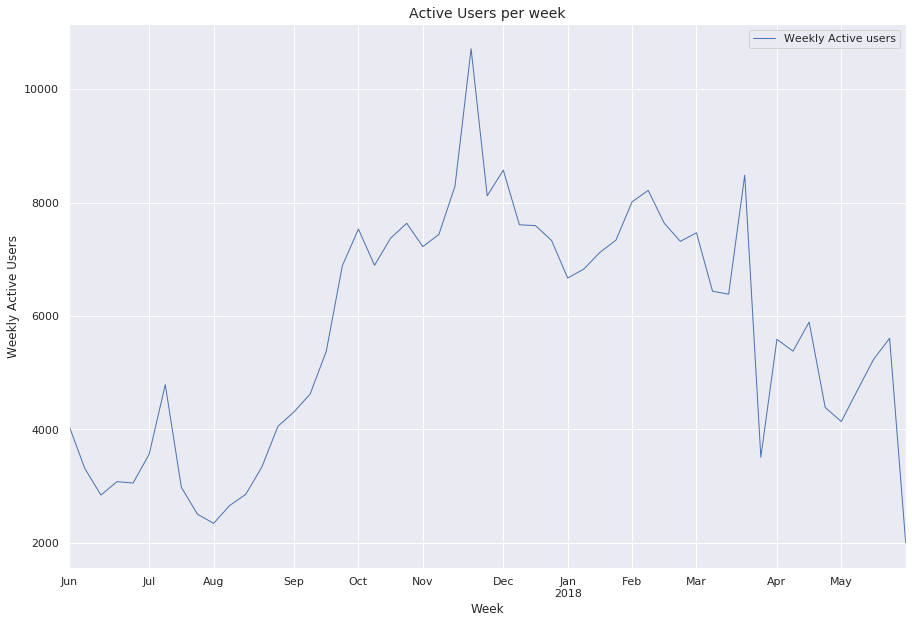

In [6]:
weekly_active_users= visits.groupby('week')['uid'].nunique()
sns.set(font_scale=1,rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
weekly_active_users.plot(ax=ax, linewidth=1, label='Weekly Active users')
plt.xlabel("Week")
plt.ylabel("Weekly Active Users")
plt.title("Active Users per week", size=14)
plt.legend()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
Speaking about the number of weekly active users (WAU), one may already notice the explicit correlation between the number of users and the specific periods of time: according to the graph, the number of active (unique) users significantly decreases between 23 and 36 weeks, in other words in summer.
</div>

Text(0.5, 1.0, 'Active Users per month')

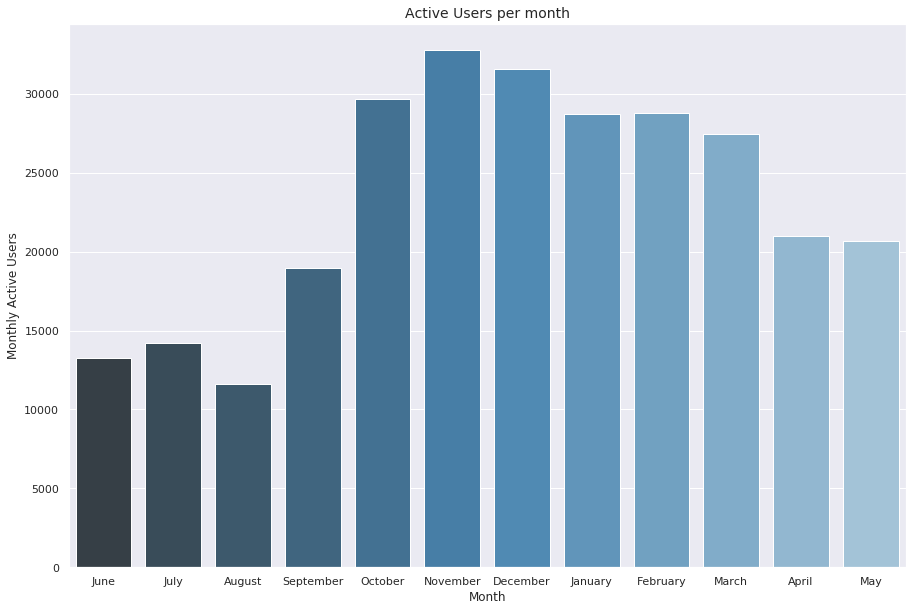

In [7]:
monthly_active_users= visits.groupby('month')['uid'].nunique().reset_index()
monthly_active_users['month_name'] = monthly_active_users['month'].dt.month_name()
monthly_active_users_index= monthly_active_users.reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(x="month_name", y="uid", data=monthly_active_users_index,
                 palette="Blues_d")
plt.xlabel("Month")
plt.ylabel("Monthly Active Users")
plt.title("Active Users per month", size=14)


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
The barplot visualisation of  the number active users by month proves the assumption made based on WAU metric visualisation: the summer months are characterized  by the smallest number of active users. Moreover, november and december are characterized by the largest number of active users (the correlation  can be also noticed on DAU visualisation).
    <p>The results are not suprising: in general clients activity and sales decreases in summer due to numerous vacations and reaches its peak in winter holidays </p>
</div>

### How many sessions are there per day? (One user might have more than one session.) <a class="anchor" id="section_2_1_2"></a>

In [8]:
print('The total number of sessions: {}'.format(len(visits)))
print('The total number of unique users: {}'.format(visits.uid.nunique()))

The total number of sessions: 359400
The total number of unique users: 228169


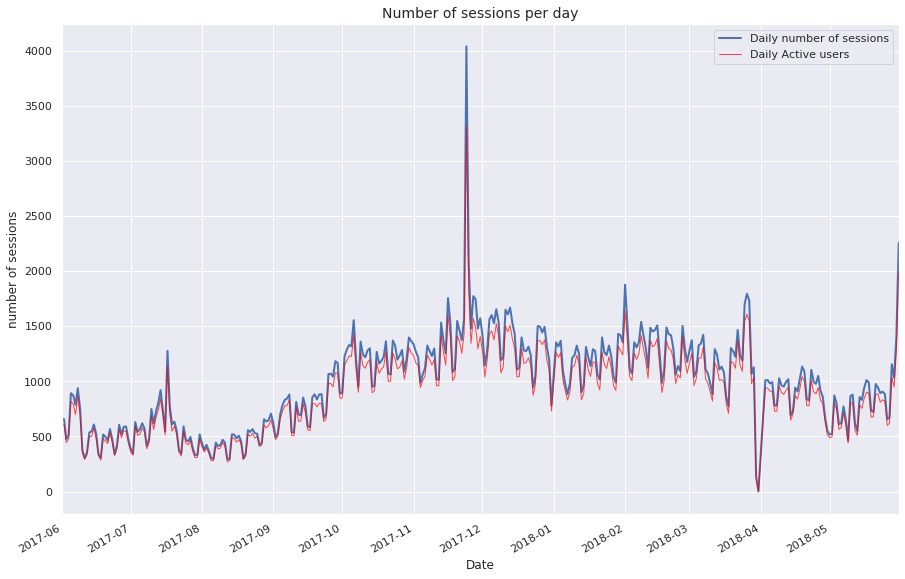

In [9]:
number_of_sessions_per_day= visits.groupby('day')['start_ts'].count()

sns.set(font_scale=1,rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
number_of_sessions_per_day.plot(ax=ax, linewidth=2, label='Daily number of sessions')
daily_active_users.plot(ax=ax, linewidth=1, label='Daily Active users' , color='red', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("number of sessions")
plt.title("Number of sessions per day", size=14)
plt.legend()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
<p>According to both calculations and visualisation, some users have more than one session every day (the plot line representing the daily number of sessions mirrors the plot line of daily active users but it is not identical).</p>
</div>

In [10]:
sessions_per_user = visits.groupby('day').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

display(sessions_per_user.head())
display(sessions_per_user['n_sessions'].mean())
display(sessions_per_user['sessions_per_user'].mean())

n_sessions  n_users  sessions_per_user
day                                               
2017-06-01         664      605           1.097521
2017-06-02         658      608           1.082237
2017-06-03         477      445           1.071910
2017-06-04         510      476           1.071429
2017-06-05         893      820           1.089024

987.3626373626373

1.082169644003972

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
In average, there are 987 sessions per day, and there is 1.08 sessions per user
</div>

   source_id  start_ts  percentage
0          1     34121         9.5
1          2     47626        13.3
2          3     85610        23.8
3          4    101794        28.3
4          5     66905        18.6
5          6         6         0.0
6          7        36         0.0
7          9     13277         3.7
8         10     10025         2.8


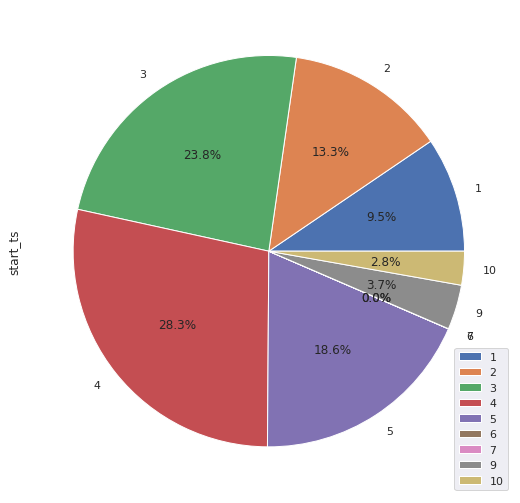

In [11]:
number_of_sessions_per_source= visits.groupby('source_id')['start_ts'].count().reset_index()
number_of_sessions_per_source['percentage'] = ((number_of_sessions_per_source['start_ts']/len(visits))*100).round(decimals=1)
print(number_of_sessions_per_source)
number_of_sessions_per_source.plot.pie(labels=number_of_sessions_per_source['source_id'], y='start_ts', figsize=(9, 9), autopct='%1.1f%%')


In [12]:
number_of_sessions_device= visits.groupby('device')['start_ts'].count().reset_index()
number_of_sessions_device['percentage'] = ((number_of_sessions_device['start_ts']/len(visits))*100).round(decimals=1)

display(number_of_sessions_device)

device  start_ts  percentage
0  desktop    262567        73.1
1    touch     96833        26.9

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
Most of sessions are conducted by the users who came from the sources: 2,3,4,5.
Most of sessions are conducted from the desktop (73%).

</div>

### What is the length of each session? <a class="anchor" id="section_2_1_3"></a>

The percentage of unsuccessful sessions (zero length): 10.0% 

The everage length of a session: 0    60
dtype: int64 


Text(0, 0.5, 'Number of sessions')

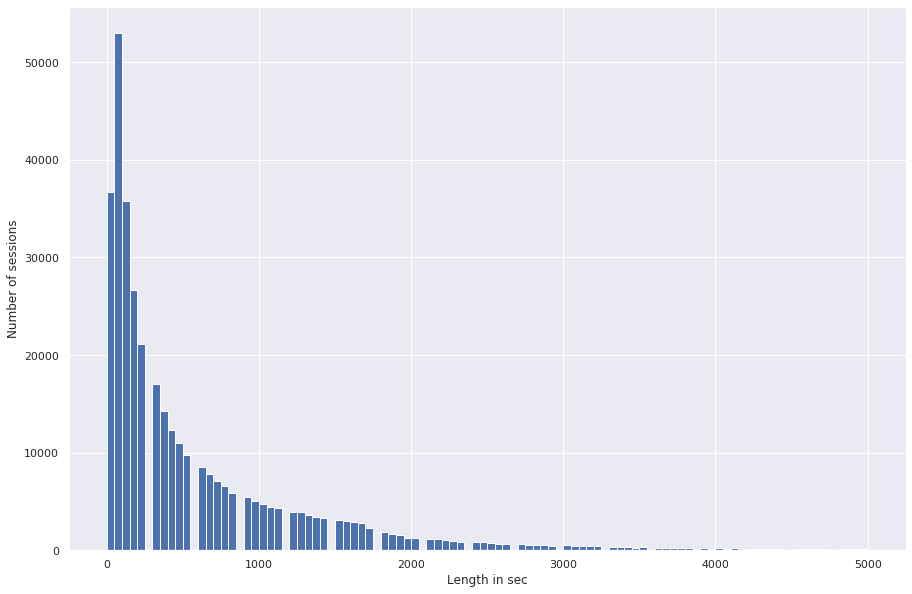

In [13]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('The percentage of unsuccessful sessions (zero length): {:.1%} \n'.format(len(visits[visits['session_duration_sec'] == 0])/len(visits)))
print('The everage length of a session: {} '.format(visits['session_duration_sec'].mode()))

plt.hist(visits['session_duration_sec'],bins=100, range=(0,5000))
plt.xlabel('Length in sec')
plt.ylabel('Number of sessions')



In [14]:
visits_touch = visits.query('device == "touch"')
print('The percentage of unsuccessful sessions (zero length) on touch devices: {:.1%} \n'.format(len(visits_touch[visits_touch['session_duration_sec'] == 0])/len(visits_touch)))

visits_desktop = visits.query('device == "desktop"')
print('The percentage of unsuccessful sessions (zero length) on desktops: {:.1%} \n'.format(len(visits_desktop[visits_desktop['session_duration_sec'] == 0])/len(visits_desktop)))



The percentage of unsuccessful sessions (zero length) on touch devices: 12.5% 

The percentage of unsuccessful sessions (zero length) on desktops: 9.0% 



<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
The distribution of session durations is not normal, the mode() is used to calculate the average session duration, which is 60 seconds. 
    
It is significant to mention that 10 percent of all sessions are unsuccessful sessions (the duration equals zero). Moreover, the percentage is higher for touch devices. 
</div>

### How often do users come back? <a class="anchor" id="section_2_1_4"></a>

In [16]:
mean_list = []
for column in retention_pivot.columns:
    mean_list.append(retention_pivot[column].mean())

retension_with_mean = retention_pivot.append([mean_list])

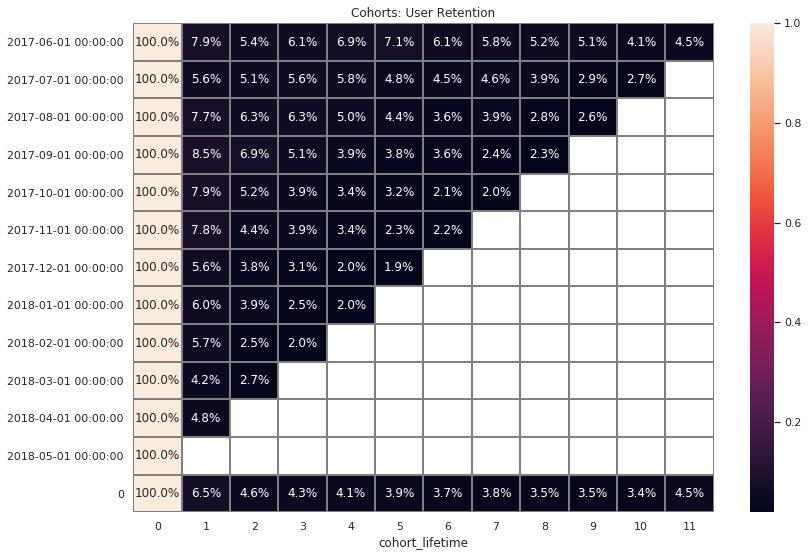

In [17]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retension_with_mean, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
The retention rates dicrease dramatically for all cohorts: starting already from the second month retention rates fell by more than 90 percentage points.
</div>

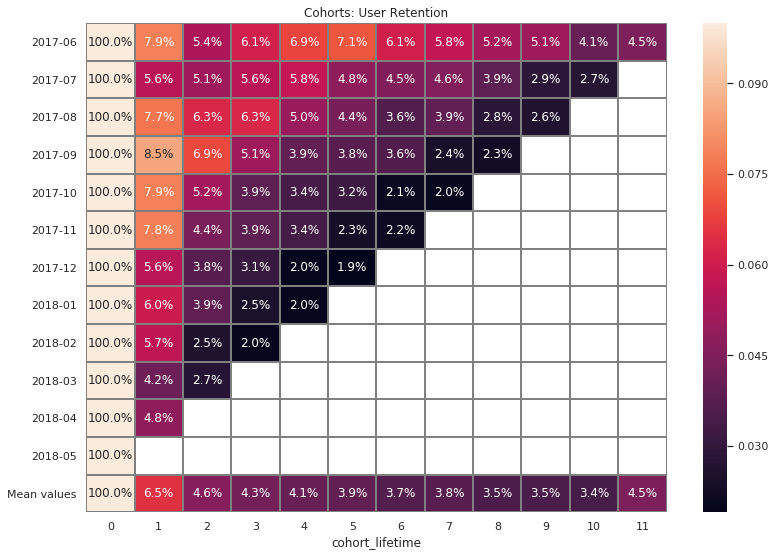

In [18]:
### Reviewer's code v2
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
y_labels = list(retension_with_mean.index.to_series()[:-1].dt.strftime('%Y-%m')) + ['Mean values']
sns.heatmap(retension_with_mean, annot=True, fmt='.1%', linewidths=1, linecolor='gray', 
            yticklabels=y_labels,
            vmax=0.1)
plt.show()

---

<div class="alert alert-info"><strong>The major findings during the user activity analysis</strong>:
<ol>
<li>The number of active users decreases dramatically in summer (due to vacations, typical to most businesses) and reaches its peak in November/December (perhaps, due to the winter holidays).</li>
<li>Major part of users come from sources 2,3,4,5, most sessions are conducted from desktop.</li>
<li>The major issues regarding user activity are: most users do not stay active after the first month after their first visit (the retention rate drops by more than 90 percent for all cohorts); 10 percent of all sessions conducted are unsuccessful.</li></ol> </div>


## Sales <a class="anchor" id="section_2_2"></a>

### When do people start buying? <a class="anchor" id="section_2_2_1"></a>

In [19]:
print('{:.1%} percents of unique users eventually complete the order'.format(1-len(set(visits['uid'].unique())-set(orders['uid'].unique()))/len(set(visits['uid'].unique()))))

16.0% percents of unique users eventually complete the order


In [20]:
first_purchase = orders.groupby(['uid'])['order_ts'].min()
first_activity_date = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit_purchase = first_activity_date.join(first_purchase,on='uid')
first_visit_purchase.columns = ['uid', 'first_visit', 'first_purchase']
first_visit_purchase["day_of_conversion"] =  (first_visit_purchase['first_purchase'] - first_visit_purchase['first_visit']).dt.days
conversion = first_visit_purchase.dropna(subset=['day_of_conversion'])


first_visit_purchase['Conversion_0d']=first_visit_purchase['day_of_conversion'].apply(lambda x: x==0)
first_visit_purchase['Conversion_7d']=first_visit_purchase['day_of_conversion'].apply(lambda x: x<=7)
first_visit_purchase['Conversion_14d']=first_visit_purchase['day_of_conversion'].apply(lambda x: x<=14)
first_visit_purchase['Conversion_30d']=first_visit_purchase['day_of_conversion'].apply(lambda x: x<=30)

conversion_table=[]
for i in ['Conversion_0d','Conversion_7d','Conversion_14d','Conversion_30d']:
    conversion_table.append((i,first_visit_purchase[first_visit_purchase[i]==True]\
                           .groupby([i])['uid'].nunique().reset_index()['uid'].loc[0]/visits.uid.nunique()*100))



In [21]:
from pandas import DataFrame
import plotly.express as px

conversion_table=DataFrame(conversion_table,columns=['Conversion','Rate'])
conversion_table

fig=px.line(conversion_table,x='Conversion',y='Rate',title='Conversion')
fig.show()

In average, the users who do complete the order, do it in the same day of the first visit
0    0.0
dtype: float64


Text(0, 0.5, 'Number of unique users')

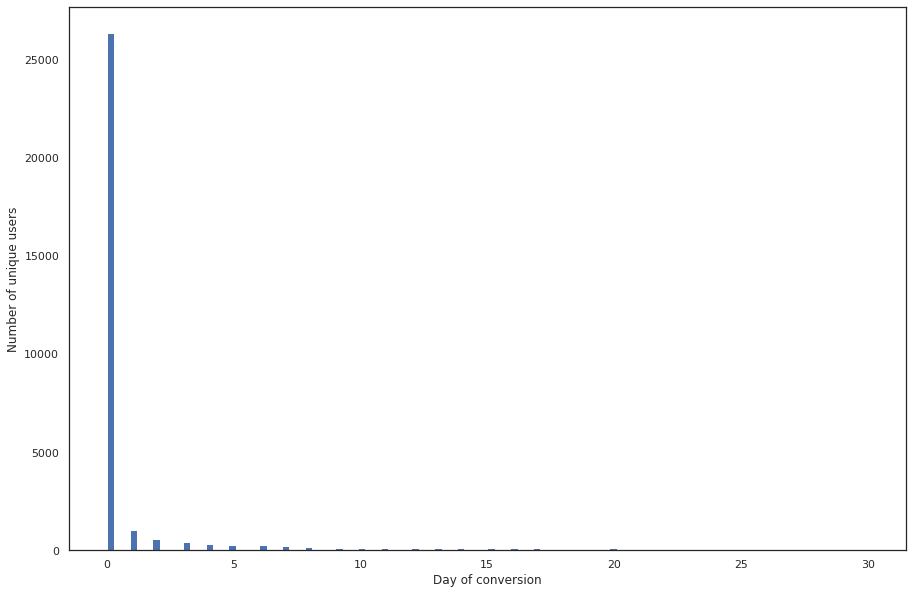

In [22]:
conversion = first_visit_purchase.dropna(subset=['day_of_conversion'])
print('In average, the users who do complete the order, do it in the same day of the first visit')
print(conversion['day_of_conversion'].mode())
plt.hist(conversion['day_of_conversion'],bins=100, range=(0,30))
plt.xlabel('Day of conversion')
plt.ylabel('Number of unique users')

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
To conclude:
    <ol>
        <li>Only 16 percent of unqiue users eventually complete an order: 11 percent of these users complete an order on the day of their first visits. 13 percent of users complete an order in the first month after their first visit.</li>
        <li>In average, the users complete an order in before the 17th day from their first visit.</li>
 </ol>
</div>

### How many orders do they make during a given period of time? <a class="anchor" id="section_2_2_2"></a>

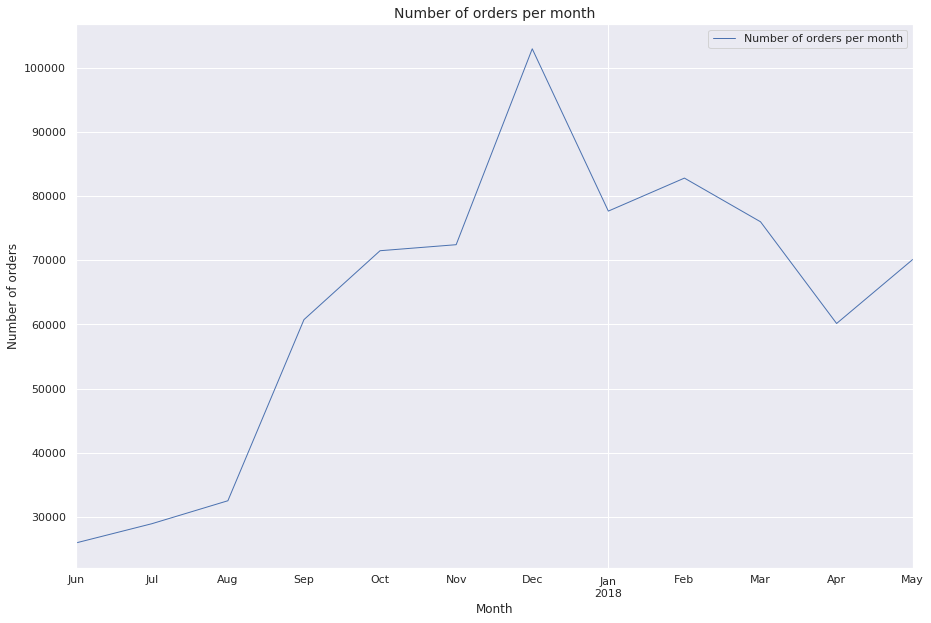

In [23]:
orders_period = orders.merge(user_activity[['uid','activity_month', 'first_activity_month', 'source_id']],on=['uid'],how='left')
orders_period['order_ts'] = orders_period['order_ts'].dt.date
orders_per_month = orders_period.groupby('activity_month')['uid'].count()
orders_per_source = orders_period.groupby('source_id')['uid'].count()

sns.set(font_scale=1,rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
orders_per_month.plot(ax=ax, linewidth=1, label='Number of orders per month')
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.title("Number of orders per month", size=14)
plt.legend()


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
As well as with visits distribution, discussed earlier, the orders distribution per month demonstrates the lowest activity in summer, and the maximum activity on November December 2018.
</div>

source_id     uid
0          1  248662
1          2  238297
2          3   46766
3          4   62683
4          5  151824
5          7       1
6          9    9547
7         10    4027

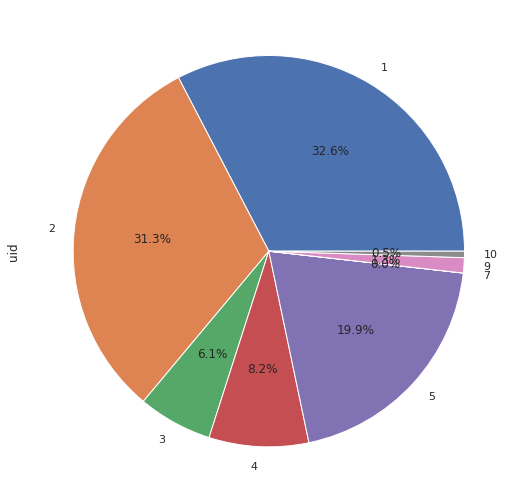

In [24]:
display(orders_per_source.reset_index())
orders_per_source.plot.pie(y='source_id', figsize=(9, 9), autopct='%1.1f%%')


In [25]:
orders_per_source = orders_per_source.reset_index()

Text(0.5, 1.0, 'Orders per source')

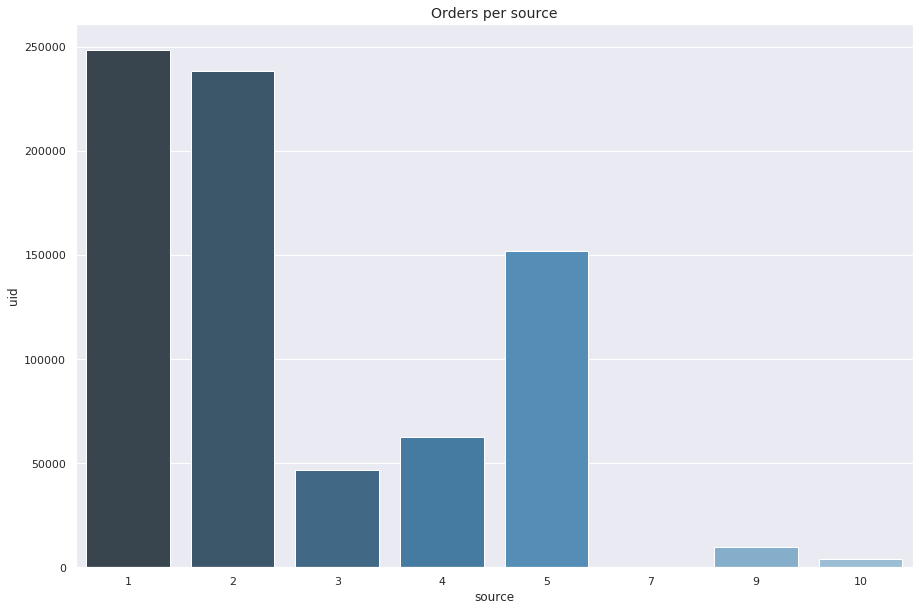

In [26]:
fig, ax = plt.subplots()
ax = sns.barplot(x="source_id", y="uid", data=orders_per_source,
                 palette="Blues_d")
plt.xlabel("source")
plt.ylabel("uid")
plt.title("Orders per source", size=14)


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
Speaking about number of orders per source, the most 'productive' sources are 1,2 and 5. It is significant to notice that, according to previous calculations, most of sessions are conducted by the users who came from the sources: 1,2,3,4. That means that conversion rates for source 3 and 4 are pretty low. There are only 6 visitors who came from the source 5, that is why the current findings about source conversion rate  are statistically insignificant for this particucar source.
</div>

### What is the average purchase size? <a class="anchor" id="section_2_2_3"></a>

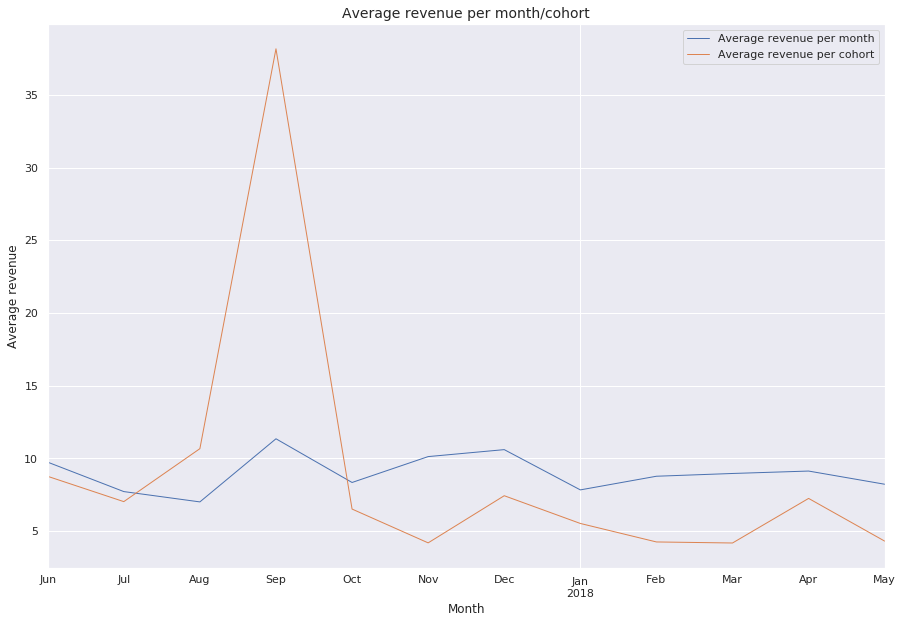

In [27]:
revenue_per_month = orders_period.groupby('activity_month')['revenue'].mean()
revenue_per_cohort = orders_period.groupby('first_activity_month')['revenue'].mean()
revenue_per_source = orders_period.groupby('source_id')['revenue'].mean()

sns.set(font_scale=1,rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
revenue_per_month.plot(ax=ax, linewidth=1, label='Average revenue per month')
revenue_per_cohort.plot(ax=ax, linewidth=1, label='Average revenue per cohort')

plt.xlabel("Month")
plt.ylabel("Average revenue")
plt.title("Average revenue per month/cohort", size=14)
plt.legend()




<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the graph, there is no explicit correlations in average revenues per month. 
However, speaking about average revenues per cohort, the september 2017 cohort can be considered a suprising outlier with extremely high average revenue. Perhaps, one shoud explore this particular cohor in depth (sales promotions, the types of products purchased and so on ) in order to find additional correlations.
</div>

source_id
1      9.242265
2     11.071013
3      6.344095
4      7.923842
5      7.781887
7      1.220000
9      3.806667
10     3.630303
Name: revenue, dtype: float64


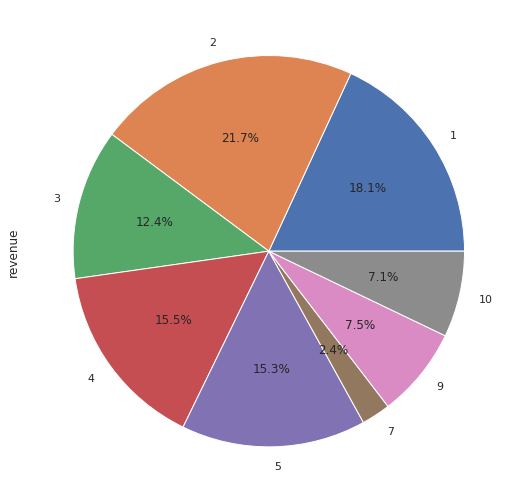

In [28]:
print(revenue_per_source)
revenue_per_source.plot.pie(y='source_id', figsize=(9, 9), autopct='%1.1f%%')


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
As in case of visits per source distribution, in revenue per source distribution the sources 1,2,3,4 can be considered the most "productive". The calculations regarding the source 5 is statistically insignificant.
</div>

### How much money do they bring? (LTV) <a class="anchor" id="section_2_2_4"></a>

In [48]:
orders['order_month'] = orders['order_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]') 
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_ = pd.merge(orders,first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = .5
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output.fillna('') 
output_cumsum = output.cumsum(axis=1)

display(output_cumsum)

age                      0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         2.362207  2.604871  2.823690  3.301026  3.812291  4.180042   
2017-07-01         3.005109  3.172715  3.484480  3.663968  3.752363  3.830387   
2017-08-01         2.638259  2.874255  3.103496  3.299135  3.546161  3.687931   
2017-09-01         2.822265  3.381058  3.641523  5.629419  5.829698  6.153231   
2017-10-01         2.501866  2.769748  2.865445  2.944017  3.019797  3.079978   
2017-11-01         2.577341  2.776958  2.876736  3.039212  3.113219  3.140158   
2017-12-01         2.369095  2.499282  2.961831  3.494468  3.650933  3.819957   
2018-01-01         2.067818  2.215197  2.367338  2.438727  2.470076       NaN   
2018-02-01         2.078494  2.217631  2.256889  2.293961       NaN       NaN   
2018-03-01         2.419401  2.569847  2.727627       NaN       NaN       NaN   
2018-04-01         2.328798  2.594598       NaN       NaN       NaN       NaN   
2018-05-01         2.330281       NaN       NaN       NaN       NaN       NaN   
2018-06-01         1.710000       NaN       NaN       NaN       NaN       NaN   

age                      6         7         8         9         10        11  
first_order_month                                                              
2017-06-01         4.655262  4.946058  5.222664  5.525559  5.811189  5.939617  
2017-07-01         3.890491  3.961401  4.042018  4.115590  4.193427       NaN  
2017-08-01         3.793263  3.995766  4.141872  4.235861       NaN       NaN  
2017-09-01         6.504035  6.625610  6.717613       NaN       NaN       NaN  
2017-10-01         3.122386  3.180121       NaN       NaN       NaN       NaN  
2017-11-01         3.197622       NaN       NaN       NaN       NaN       NaN  
2017-12-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-06-01              NaN       NaN       NaN       NaN       NaN       NaN

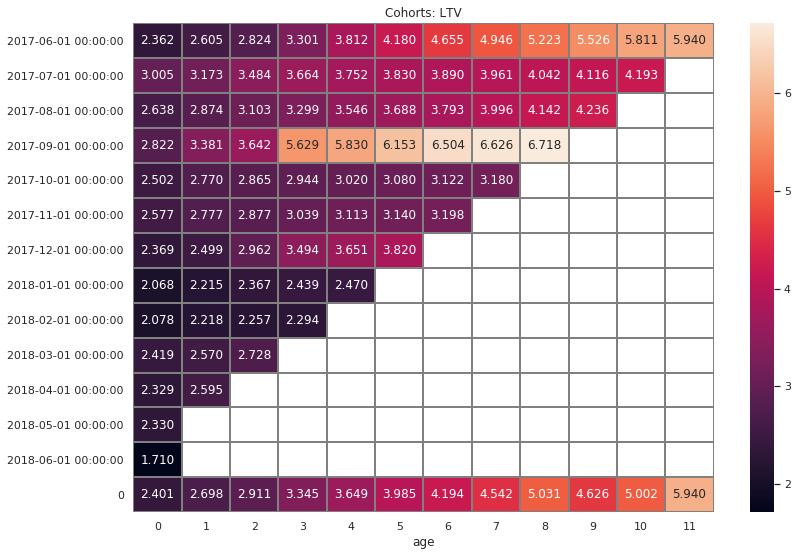

In [49]:
mean_list = []
for column in output_cumsum.columns:
    mean_list.append(output_cumsum[column].mean())

output_with_mean = output_cumsum.append([mean_list])

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(output_with_mean, annot=True, fmt='.3f', linewidths=1, linecolor='gray'); 
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
There are two major findings here:
    <ol>
        <li>The visitors make order mostly in the first month after first visiting (so they bring money solely in the first month)</li>
        <li>The September 2017 cohort is leading in ltv rate.</li>
    </ol>
</div>

In [31]:
revenue_per_source = orders_period.groupby('source_id')['revenue'].sum().reset_index()
n_buyers_per_source = orders_period.groupby('source_id')['uid'].count().reset_index()


source_table = revenue_per_source.merge(n_buyers_per_source, on='source_id')
source_table['ltv'] = (source_table['revenue']*margin_rate)/source_table['uid']
display(source_table)


source_id       revenue     uid       ltv
0          1  2.298200e+06  248662  4.621133
1          2  2.638189e+06  238297  5.535507
2          3  2.966880e+05   46766  3.172048
3          4  4.966902e+05   62683  3.961921
4          5  1.181477e+06  151824  3.890943
5          7  1.220000e+00       1  0.610000
6          9  3.634225e+04    9547  1.903334
7         10  1.461923e+04    4027  1.815151

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    The buyers who came from the sources 1,2 are characterized by the highest lifetime value.
    </div>

<div class="alert alert-info"><strong>The major findings during orders analysis section:</strong>
<ol>
<li>Only 16 percent of unqiue users eventually complete an order: 11 percent of these users complete an order on the day of their first visits.</li>
<li>Speaking about number of orders per source, the most 'productive' sources are 1,2: in terms of conversion rates and lifetime value.</li>
<li>The september 2017 cohort can be considered a suprising outlier with extremely high average revenue (perhaps there were some sales promotions due to the start of the studying year)</li></ol></div>

###  MARKETING <a class="anchor" id="section_2_3"></a>

### How much money was spent? Overall/per source/over time <a class="anchor" id="section_2_3_1"></a>

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

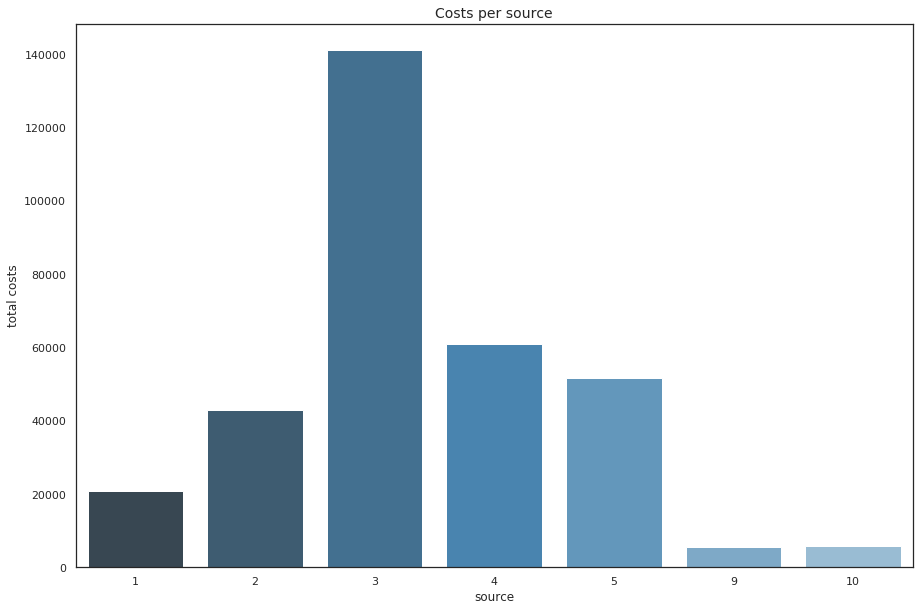

In [32]:
costs_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

fig, ax = plt.subplots()
ax = sns.barplot(x="source_id", y="costs", data=costs_source,
                 palette="Blues_d")
plt.xlabel("source")
plt.ylabel("total costs")
plt.title("Costs per source", size=14)

display(costs_source)


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    According to the previous calculations, the sources 3 and 4, inspite of the large number of visitors they bring, are characterized by low conversion rates. That is why, according to the current bar plot, the source 3 can be considered the least advantageous in terms of revenue/cost ratio.
    </div>

[Text(0, 0, '2017-06-01 00:00:00'),
 Text(0, 0, '2017-07-01 00:00:00'),
 Text(0, 0, '2017-08-01 00:00:00'),
 Text(0, 0, '2017-09-01 00:00:00'),
 Text(0, 0, '2017-10-01 00:00:00'),
 Text(0, 0, '2017-11-01 00:00:00'),
 Text(0, 0, '2017-12-01 00:00:00'),
 Text(0, 0, '2018-01-01 00:00:00'),
 Text(0, 0, '2018-02-01 00:00:00'),
 Text(0, 0, '2018-03-01 00:00:00'),
 Text(0, 0, '2018-04-01 00:00:00'),
 Text(0, 0, '2018-05-01 00:00:00')]

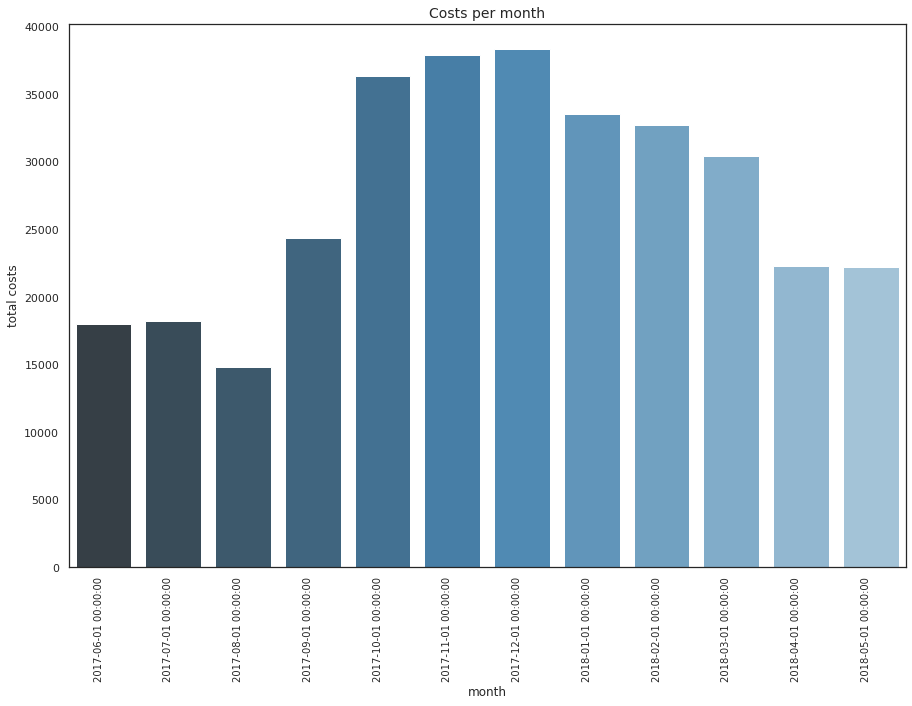

In [33]:
costs_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(x="month", y="costs", data=costs_month,
                 palette="Blues_d")
plt.xlabel("month")
plt.ylabel("total costs")
plt.title("Costs per month", size=14)
ax.set_xticklabels(costs_month.month, rotation=90, fontdict={'horizontalalignment':'right', 'size': 10})


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
As one may notice, the summer months are characterized by low costs for customer acquisition. It can be correlated that the summer months are characterized by the smallest numbers of visitors. Perhaps the marketing department should consider to invest more in 'summer' visitors acquisition.
</div>

### How much did customer acquisition from each of the sources cost? <a class="anchor" id="section_2_3_2"></a>

In [34]:
cac_source = costs_source.merge(n_buyers_per_source, on='source_id')
cac_source['cac'] = cac_source['costs']/cac_source['uid']
display(cac_source)

source_id      costs     uid       cac
0          1   20833.27  248662  0.083781
1          2   42806.04  238297  0.179633
2          3  141321.63   46766  3.021888
3          4   61073.60   62683  0.974325
4          5   51757.10  151824  0.340902
5          9    5517.49    9547  0.577929
6         10    5822.49    4027  1.445863

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
CAC ratio in combination with previous calculations (on convertion) demonstrate that the  high cost of customer acquisition from the source 3, 4 and 10 can be considered as unjustified. 
</div>

### How worthwhile where the investments? (ROI) <a class="anchor" id="section_2_3_3"></a>

In [35]:
monthly_costs = costs.groupby('month')['costs'].sum()
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']


In [45]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output_cumsum = output.cumsum(axis=1) 
display(output_cumsum)

age                      0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         0.265265  0.292515  0.317087  0.370690  0.428102  0.469399   
2017-07-01         0.316811  0.334481  0.367349  0.386271  0.395590  0.403816   
2017-08-01         0.244373  0.266233  0.287467  0.305588  0.328469  0.341601   
2017-09-01         0.298916  0.358100  0.385687  0.596232  0.617445  0.651711   
2017-10-01         0.298933  0.330940  0.342375  0.351763  0.360817  0.368008   
2017-11-01         0.277466  0.298955  0.309697  0.327189  0.335156  0.338056   
2017-12-01         0.271007  0.285900  0.338812  0.399742  0.417640  0.436976   
2018-01-01         0.208086  0.222917  0.238227  0.245411  0.248566       NaN   
2018-02-01         0.231903  0.247427  0.251807  0.255944       NaN       NaN   
2018-03-01         0.281035  0.298510  0.316838       NaN       NaN       NaN   
2018-04-01         0.237797  0.264938       NaN       NaN       NaN       NaN   
2018-05-01         0.313301       NaN       NaN       NaN       NaN       NaN   

age                      6         7         8         9         10        11  
first_order_month                                                              
2017-06-01         0.522764  0.555419  0.586481  0.620494  0.652569  0.666991  
2017-07-01         0.410152  0.417628  0.426127  0.433883  0.442089       NaN  
2017-08-01         0.351358  0.370115  0.383648  0.392354       NaN       NaN  
2017-09-01         0.688866  0.701743  0.711487       NaN       NaN       NaN  
2017-10-01         0.373075  0.379973       NaN       NaN       NaN       NaN  
2017-11-01         0.344242       NaN       NaN       NaN       NaN       NaN  
2017-12-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN

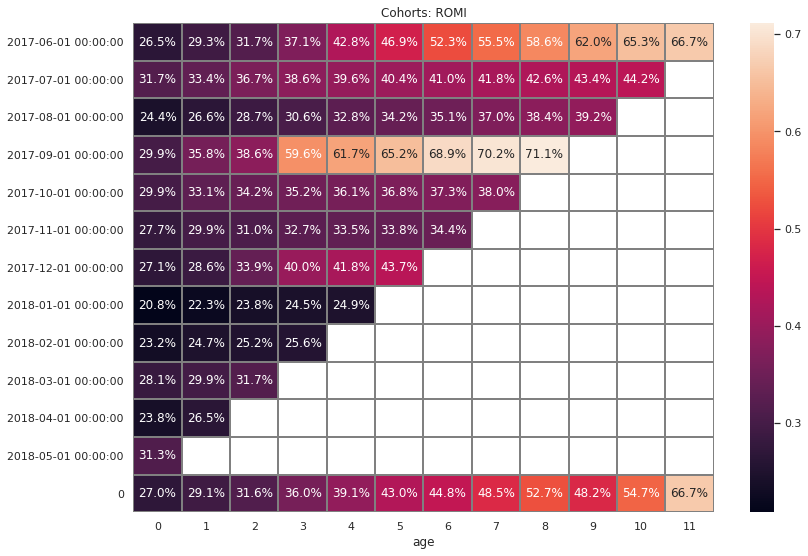

In [46]:
mean_list = []
for column in output_cumsum.columns:
    mean_list.append(output_cumsum[column].mean())

output_with_mean = output_cumsum.append([mean_list])

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output_with_mean, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
On average, no cohort hasn't paid off yet. The good pay off dynamics can be noticed in JUNE 2017 and SEPTEMBER 2017 cohorts. 
</div>

In [31]:
source_table_final = source_table.merge(cac_source, on='source_id')
source_table_final['romi'] = source_table_final['ltv'] / source_table_final['cac']

display(source_table_final)

source_id       revenue   uid_x       ltv      costs   uid_y       cac  \
0          1  2.298200e+06  248662  4.621133   20833.27  248662  0.083781   
1          2  2.638189e+06  238297  5.535507   42806.04  238297  0.179633   
2          3  2.966880e+05   46766  3.172048  141321.63   46766  3.021888   
3          4  4.966902e+05   62683  3.961921   61073.60   62683  0.974325   
4          5  1.181477e+06  151824  3.890943   51757.10  151824  0.340902   
5          9  3.634225e+04    9547  1.903334    5517.49    9547  0.577929   
6         10  1.461923e+04    4027  1.815151    5822.49    4027  1.445863   

        romi  
0  55.156972  
1  30.815619  
2   1.049691  
3   4.066325  
4  11.413672  
5   3.293368  
6   1.255410

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
As mentioned prevously (on the basis of conversion and revenue calculations), sources 1 and 2 can be considered as the most "productive" also in the context of their romi ratios. 
</div>

The marketing expences need to be optimized in view of the two major findings:
<ol>
    <li>The retention rates dicrease dramatically for all cohorts: starting already from the second month retention rates fell by more than 90 percentage points. In other words, most of visitors do not come back to the website starting from the second month from their virst visit. Consequently, they do not conduct more orders.</li>
    <li>On average, no cohort hasn't paid off yet. That means that it is already a year that Yanex.Afisha has been suffering losses.</li>   
    </ol>
    
In this connection, the following steps for the optimization of marketing expences can be adviced:
<ol>
    <li>The marketing department may increase the costs for <strong>summer months</strong> cohort users acquisition, which are characterized by the lowest numbers of users (and as a result by the lowest numbers of orders made) </li>
    <li>Making the decision to increase or to decrease the costs, the marketing department should pay attention to the source, from which the visitors come. The most "pruductive" sources are 1 and 2 (in terms of number of orders, revenue and romi ratio, lifetime value), so it is reasonable to keep investing into users from these sources. On the other hand, the high cost of customer acquisition from the source 3, 4 and 10 can be considered as unjustified (the source 3 can be considered the least advantageous in terms of revenue/cost ratio).</li>
    <li>Marketing department should pay attention to the category of device used by users. Most of sessions are conducted from the desktop (73%). Here it is significant to mention that that 10 percent of all sessions are unsuccessful sessions. Moreover, the percentage is higher for touch devices. So, perhaps the technical issues should be checked in order to increase retention and consequently conversion rates </li>
    <li>Due to the fact that most of users visit/complete the order only in the first month after their first visit it is reasonable to think about the strategies to attract old users to come back to the website. It can be made or by increasing retention rate (see the first recommendation) or by increasing conversion rate (for instance by mail lists with sales promotions) </li>
    <li>The september 2017 cohort can be considered a suprising outlier with extremely high average revenue and lifetime value. This particular cohort should be analysed in depth in order to get some insights for successful marketing strategies. </li>
    </ol>
